In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PROJECTS/household_energy_consumption_prediction/household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

EXPLORE DATA

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


HANDLE DATETIMES

In [7]:
# create timestamp column
df["Timestamp"] = df["Date"]+ " " + df["Time"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)
timestampcol = df.pop("Timestamp")
df.insert(0, "Timestamp", timestampcol)

CONVERT TO NUMERIC VARIABLES

In [8]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

DROP MISSING VALUES

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(2049280, 10)

CALCULATE ENERGY CONSUMPTION

In [11]:
df['Energy Consumption Kwh'] = df['Global_active_power'] / 60

In [12]:
df.set_index("Timestamp", inplace=True)

EXPLORING WHAT HAPPENED FIRST DAY

In [13]:
first_day_df = df.iloc[:1440]
print(f"first day kwh consumption {first_day_df['Energy Consumption Kwh'].sum()} ")
print(f"first day average consumption {first_day_df['Energy Consumption Kwh'].mean()} ")


first day kwh consumption 59.70546666666667 
first day average consumption 0.041462129629629633 


In [14]:
first_day_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy Consumption Kwh
Timestamp,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,0.070267
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,0.089333
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,0.089567
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,0.089800
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,0.061100


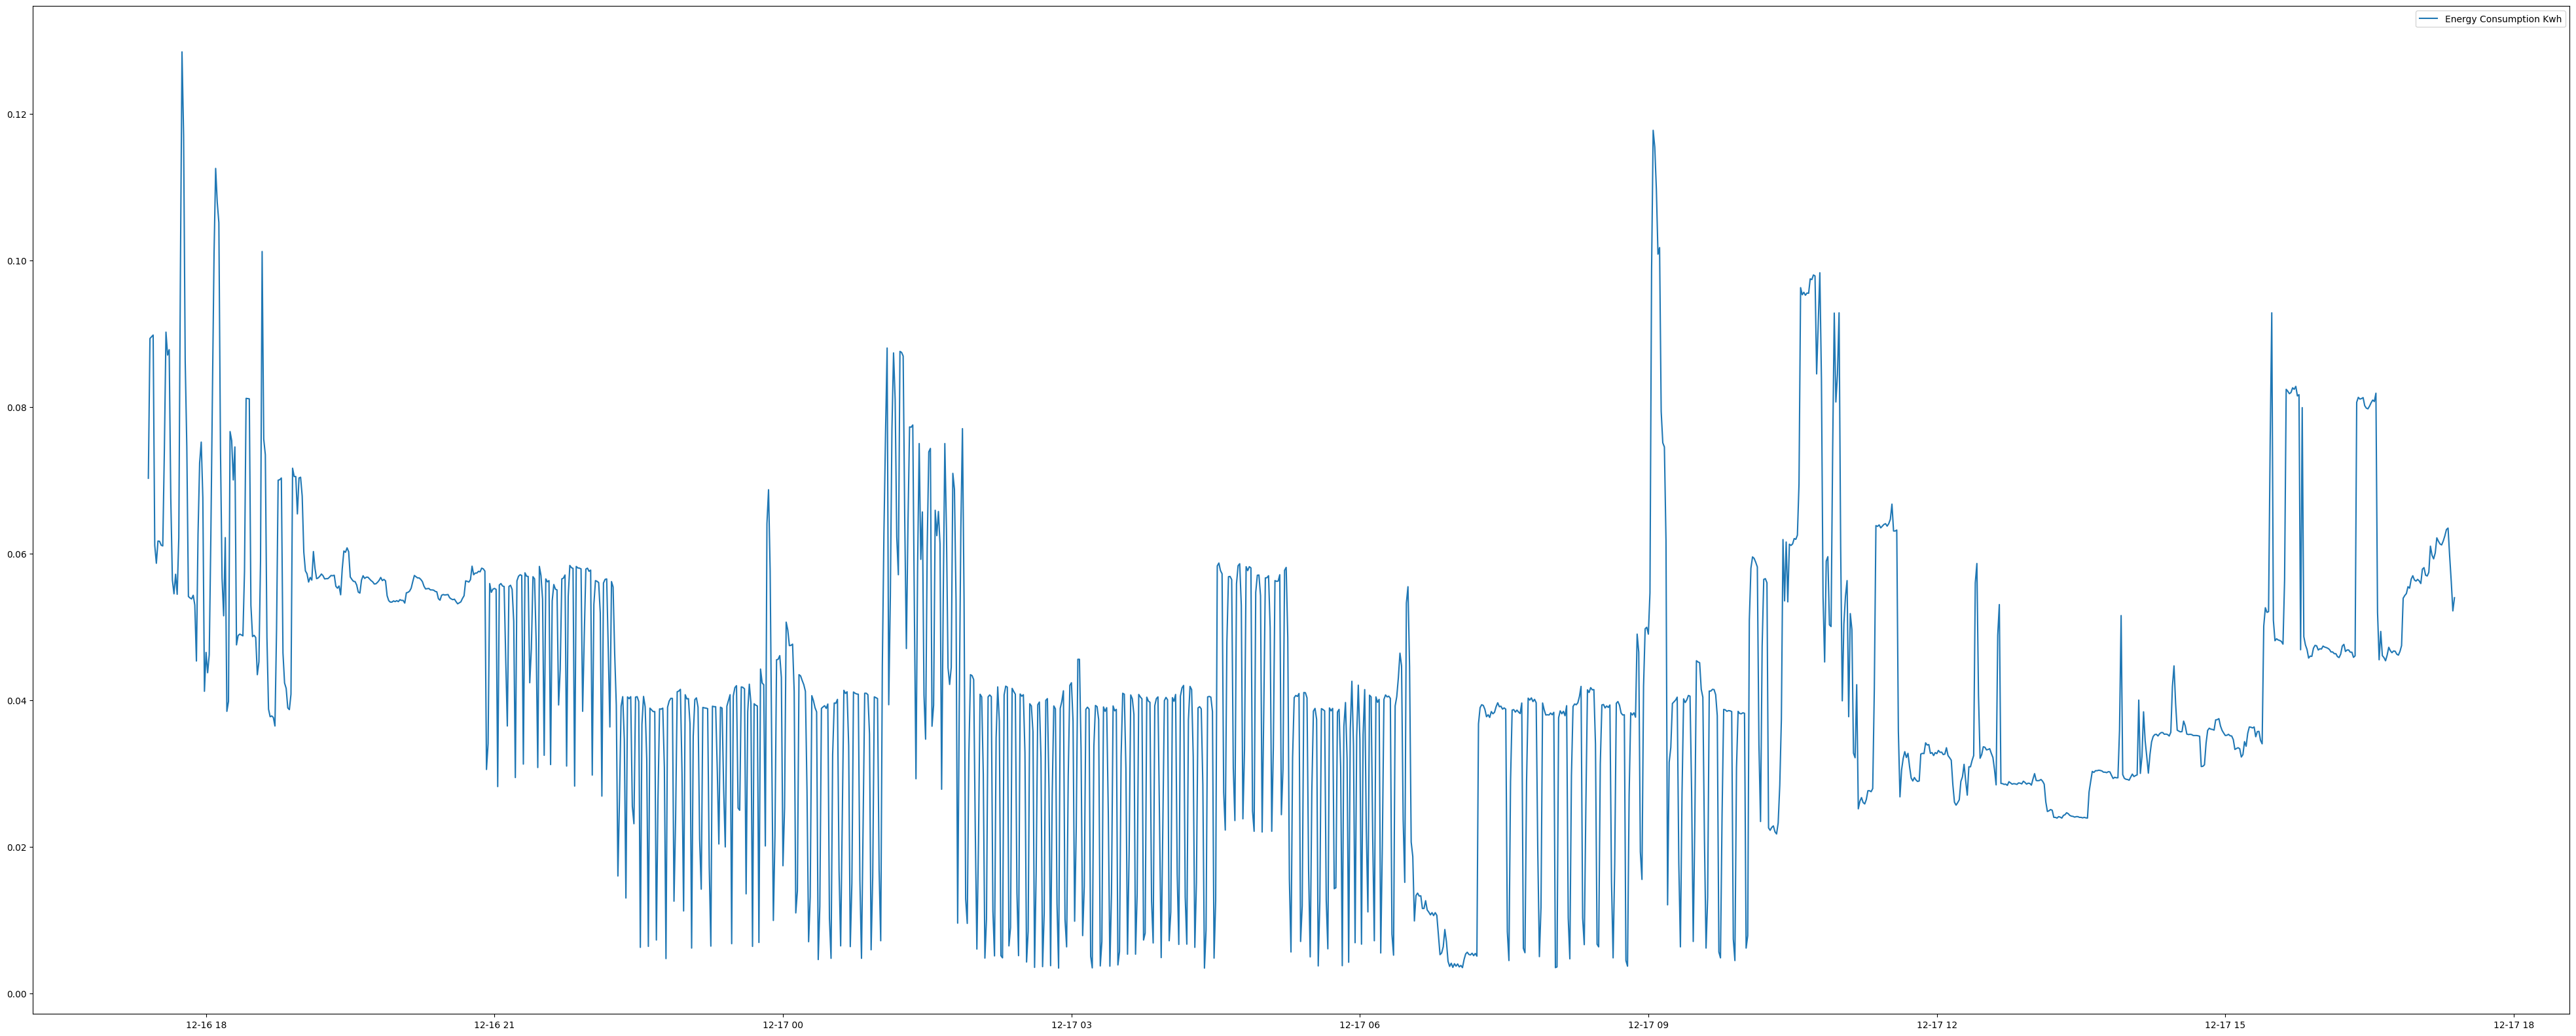

In [15]:
plt.figure(figsize=(50, 20) )

plt.plot(first_day_df['Energy Consumption Kwh'], label="Energy Consumption Kwh")
plt.legend()
plt.show()

CREATE HOURLY DATASET (RESAMPLE)

In [16]:
active_power_column = df['Global_active_power'].resample("h").sum()
energy_consumption_column = df['Energy Consumption Kwh'].resample("h").sum()


In [17]:
df_hourly = pd.concat([active_power_column, energy_consumption_column], axis=1)

In [18]:
df_hourly.head()

,Global_active_power,Energy Consumption Kwh
Timestamp,,
2006-12-16 17:00:00,152.024,2.533733
2006-12-16 18:00:00,217.932,3.632200
2006-12-16 19:00:00,204.014,3.400233
2006-12-16 20:00:00,196.114,3.268567
2006-12-16 21:00:00,183.388,3.056467


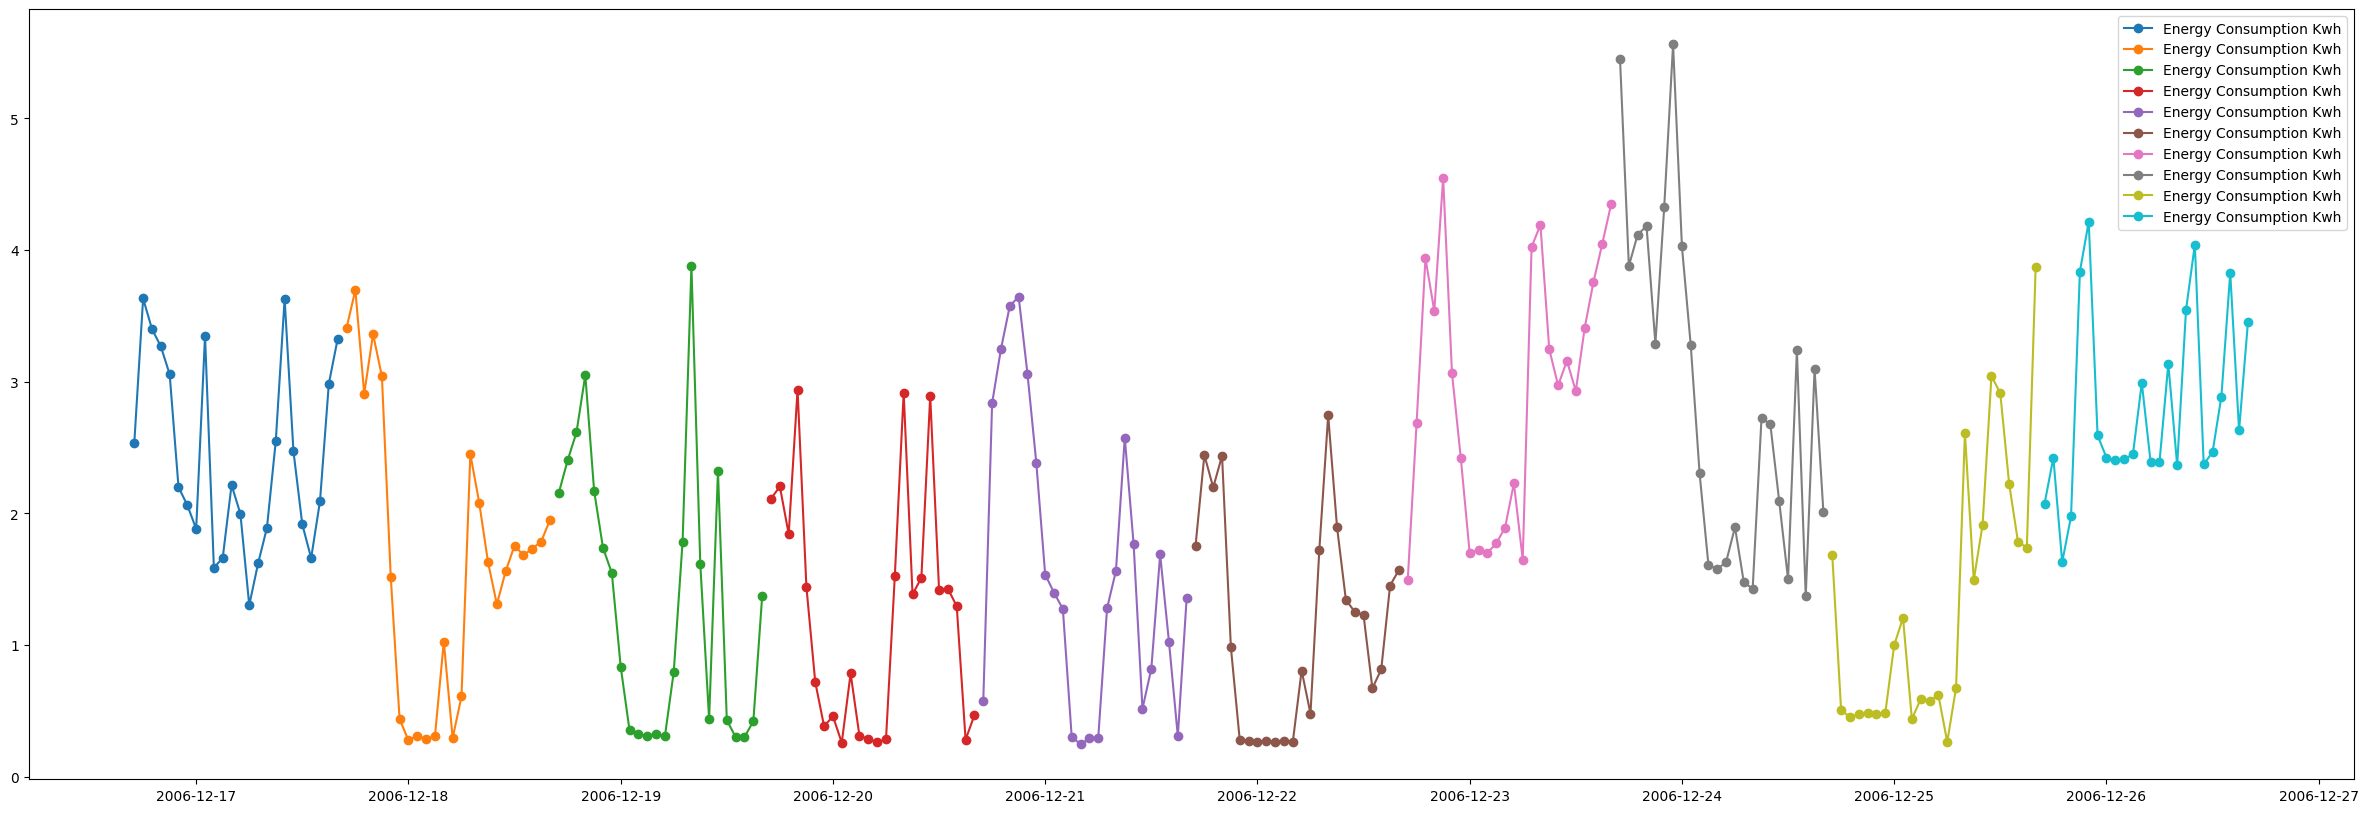

In [19]:
plt.figure(figsize=(30, 10) )

for i in range(0,240,24):
  plt.plot(df_hourly['Energy Consumption Kwh'][i:i+24], label="Energy Consumption Kwh", marker="o")
plt.legend()
plt.show()

CREATE DAILY DATASET

In [20]:
active_power_column_d = df['Global_active_power'].resample("d").sum()
energy_consumption_column_d = df['Energy Consumption Kwh'].resample("d").sum()

df_daily = pd.concat([active_power_column_d, energy_consumption_column_d], axis=1)

In [21]:
df_daily.head()

,Global_active_power,Energy Consumption Kwh
Timestamp,,
2006-12-16,1209.176,20.152933
2006-12-17,3390.460,56.507667
2006-12-18,2203.826,36.730433
2006-12-19,1666.194,27.769900
2006-12-20,2225.748,37.095800


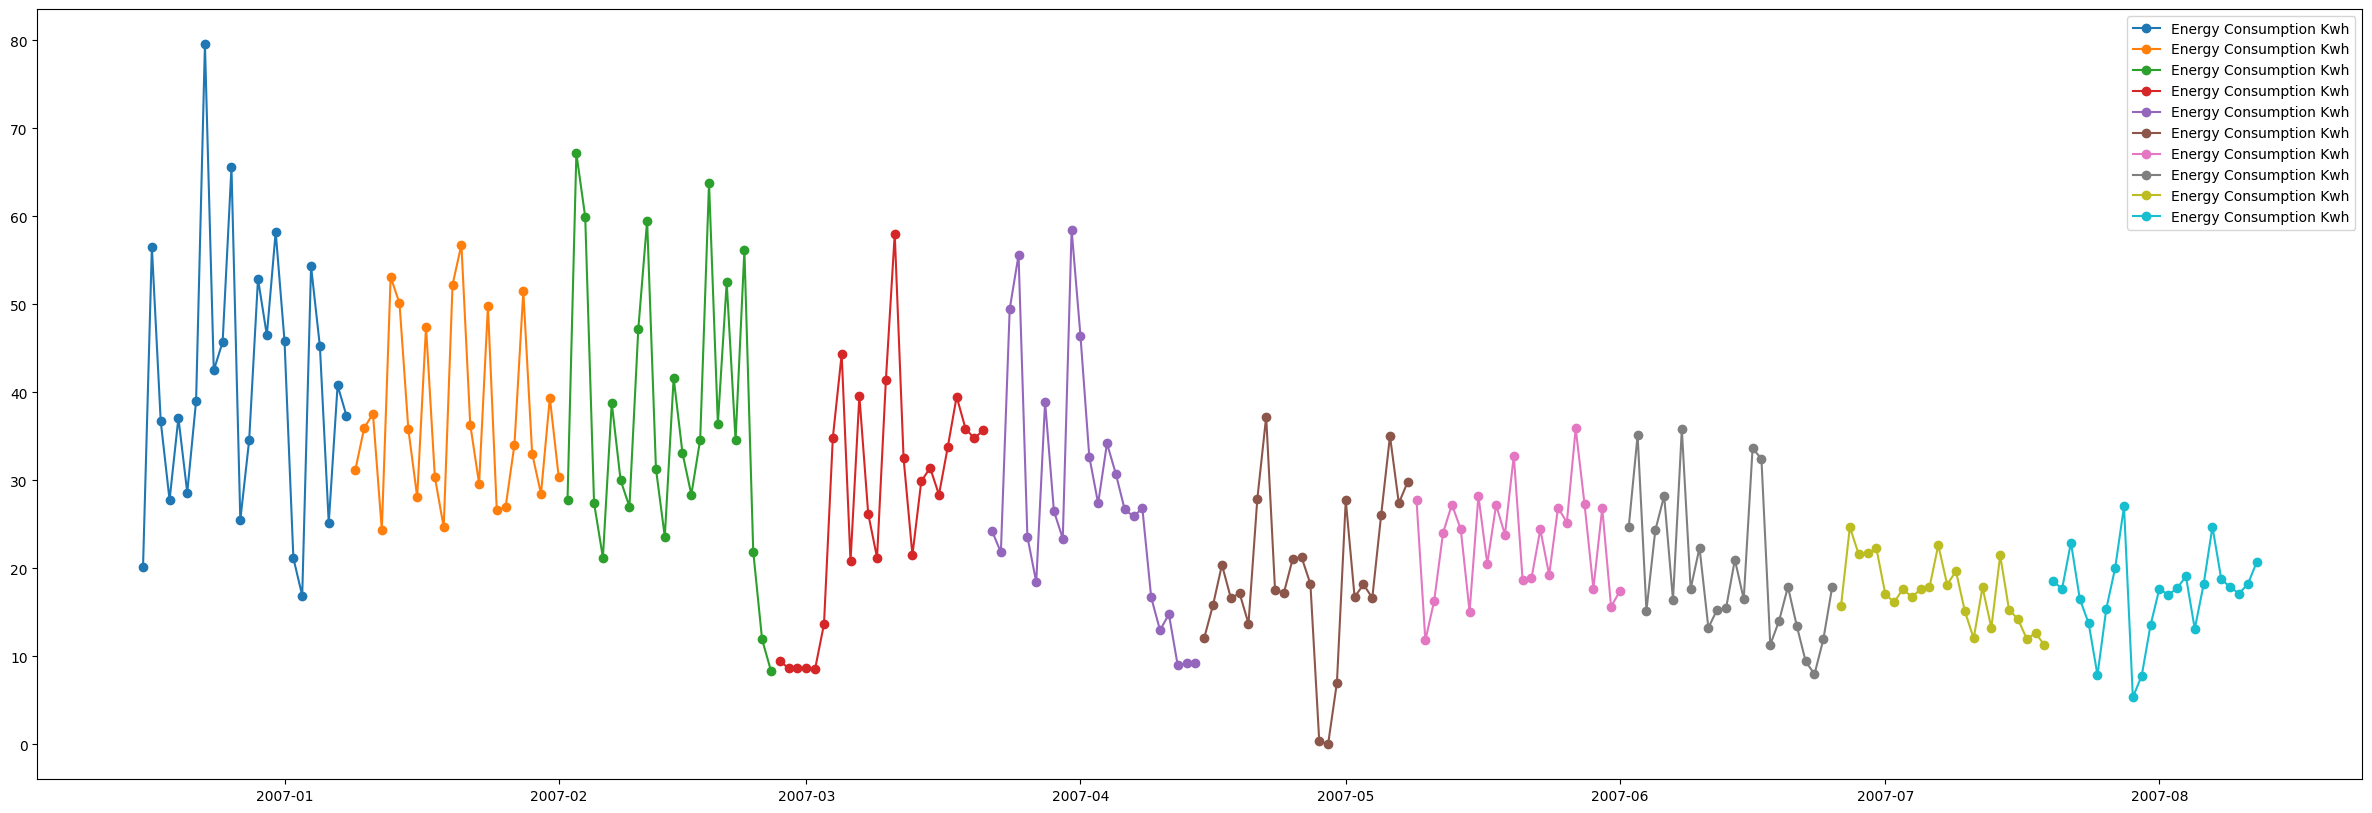

In [22]:
plt.figure(figsize=(30, 10) )

for i in range(0,240,24):
  plt.plot(df_daily['Energy Consumption Kwh'][i:i+24], label="Energy Consumption Kwh", marker="o")
plt.legend()
plt.show()